CHANNEL MIGRATION ZONE ANALYSIS - Basic Neural Network

# Creating a multi-layer perceptron for classification of channel migration points

In [1]:
# Import packages
import pandas as pd
import numpy as np
np.random.seed(23) # for reproducibility

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# Read in the clean dataset of channel migration zone points
csv = r'/Users/Daniel/Documents/Programming/Project_Scripts/CMZ/JupyterNotebooks/cmz_points_clean.csv'

df = pd.read_csv(csv, header=0)
# print (df.head())
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797021 entries, 0 to 797020
Data columns (total 13 columns):
Unnamed: 0            797021 non-null int64
FID                   797021 non-null int64
2011topo              797021 non-null float64
stream_slope          797021 non-null float64
near_crossing         797021 non-null float64
near_road             797021 non-null float64
ground_delta          797021 non-null float64
near_stream           797021 non-null int64
ground_curve          797021 non-null float64
relative_elevation    797021 non-null float64
ground_slope          797021 non-null float64
long_WGS84            797021 non-null float64
lat_WGS84             797021 non-null float64
dtypes: float64(10), int64(3)
memory usage: 79.1 MB
None


In [8]:
# Convert the predictor data to numpy array for neural network
drop_columns = ['Unnamed: 0', 'ground_delta','FID','2011topo', 'long_WGS84', 'lat_WGS84']
df_predictors = df.drop(drop_columns, axis=1)
print (df_predictors.tail())
predictors = df_predictors.values
print ('\n','predictor variables shape: ', predictors.shape)

        stream_slope  near_crossing  near_road  near_stream  ground_curve  \
797016       1.11881    1079.270020   1.010220          529     -0.369341   
797017       1.11881    1076.959961   0.939731          529      0.063435   
797018       1.11881    1074.660034   0.869239          530      0.889757   
797019       1.11881    1072.349976   0.798747          530      0.492872   
797020       1.11881    1070.050049   0.728255          531      0.810463   

        relative_elevation  ground_slope  
797016             11.0122       2.73525  
797017             10.9282       2.31429  
797018             10.9409       2.08120  
797019             10.8442       2.03391  
797020             10.6465       2.05577  

 predictor variables shape:  (797021, 7)


# Converting the target variables from float to binary

In [9]:
# Create a copy of the response data - 'delta_clip', print id's to ensure unique python objects
target = df['ground_delta'].copy(deep=True)

# Describe the target data before conversion to binary form
print (target.describe())

# Convert the data, based on upper and lower noise bounds as defined here:

# Interpreting the -2 to 2 interval as 0 (no response and accounting for noisy data) 
# and all other values as 1 (positive response)
if False:
    for i in range(len(target)):
        if lower_noise < target[i] < upper_noise:
            target[i]=0
        else:
            target[i]=1

# Assign for positive and negative responses: -1, 0, or 1
if True:
    for i in range(len(target)):
        if target[i] < 0:
            target[i] = 1 
        elif target[i] > 0:
            target[i] = 1
        else:
            target[i] = 0
            
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(target)
encoded_target = encoder.transform(target)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_target = np_utils.to_categorical(encoded_target)

print (dummy_target)

count    797021.000000
mean          0.069963
std           2.177401
min         -97.996101
25%           0.000000
50%           0.000000
75%           0.000000
max          41.018600
Name: ground_delta, dtype: float64
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


In [24]:
# # Train Test Split
# from sklearn.model_selection import train_test_split
# # Create training and test sets
# X_train, X_test, y_train, y_test = train_test_split(predictors, dummy_target, test_size = .3, random_state=23)
# # y_train = y_train.reshape((-1, 1))

In [12]:
# Build ANN for classification task 

# To evaluate how well the model performs, we split the data during 
# the fit step using the validation_split argument.  During compiling 
# the model we also add the metrics keyword argument.  The training phase
# will now monitor both fit on the training data and accuracy on the 
# test data

# import sys; print (sys.version)
import keras

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import backend

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

print (n_cols, input_shape)

# Specify the model with dense layers and dropout layers
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
# model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=3)

# Compile the model (multiclass)
if False:
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# Compile the model (binary classification)
if True:
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# print the model summary
model.summary()

# print(predictors.shape)
# print(dummy_target.shape)

# Fit the model
history = model.fit(predictors,dummy_target,validation_split=0.3, callbacks=[early_stopping_monitor], verbose=1)



7 (7,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               800       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102       
Total params: 5,952
Trainable params: 5,952
Non-trainable params: 0
_________________________________________________________________
Train on 557914 samples, validate on 239107 samples
Epoch 1/10
557914/557914 [==============================] - 65s 117us/step - loss

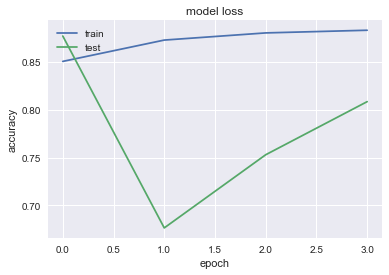

In [13]:
# summarize history for loss

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
# plt.plot(history.history['coeff_determination_R2'])
# plt.plot(history.history['val_coeff_determination_R2'])

# plt.plot(history.history['rmse'])
# plt.plot(history.history['val_rmse'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim([0,50])
plt.show()

# We've looked at one reach of one river, but just by the numbers these results are reasonable for a noisy and stochastic natural resource problem.  Plenty more work to do to bring this to a deployable state, but there's promise!